In [1]:
from __future__ import division, print_function, absolute_import
from past.builtins import basestring

import os
from collections import Counter

import pandas as pd
from matplotlib import pyplot as plt 

from twip.constant import DATA_PATH

In [2]:
import matplotlib
from IPython.display import display, HTML 
%matplotlib inline
np = pd.np
display(HTML("<style>.container { width:100% !important; }</style>"))
pd.set_option('display.max_rows', 8)
pd.set_option('display.max_columns', 250)
%pprint

Pretty printing has been turned OFF


In [6]:
import gzip
with gzip.open(os.path.join(DATA_PATH, 'cleaned_tweets.csv.gz'), 'rb') as f:
    df = pd.read_csv(f, encoding='utf8', low_memory=False)
rawlen = len(df)
df.drop_duplicates('id_str', keep='last', inplace=True)
rawlen - len(df)

10308

In [ ]:
mask = np.array([bool('date' in c) for c in df.columns])
df.columns[mask]

In [ ]:
df.columns[np.array([bool('time' in c) for c in df.columns])]

Remember any date or time columns from Dan's tutorial?

In [8]:
mask = np.array([c.endswith('_at') for c in df.columns])
df.columns[mask]

Index([u'created_at', u'quoted_status_created_at',
       u'quoted_status_user_created_at', u'retweeted_status_created_at',
       u'retweeted_status_quoted_status_created_at',
       u'retweeted_status_quoted_status_user_created_at',
       u'retweeted_status_user_created_at', u'user_created_at'],
      dtype='object')

In [9]:
dates = df[df.columns[mask]]
dates

,created_at,quoted_status_created_at,quoted_status_user_created_at,retweeted_status_created_at,retweeted_status_quoted_status_created_at,retweeted_status_quoted_status_user_created_at,retweeted_status_user_created_at,user_created_at
87,Sun Apr 24 16:39:11 +0000 2016,NaN,NaN,NaN,NaN,NaN,NaN,Fri Jan 02 23:58:29 +0000 2015
88,Sun Apr 24 16:39:08 +0000 2016,NaN,NaN,NaN,NaN,NaN,NaN,Fri Oct 30 13:32:51 +0000 2009
90,Sun Apr 24 16:38:42 +0000 2016,NaN,NaN,NaN,NaN,NaN,NaN,Tue Apr 30 05:44:27 +0000 2013
101,Tue Apr 26 21:47:32 +0000 2016,NaN,NaN,NaN,NaN,NaN,NaN,Tue Dec 29 02:12:22 +0000 2015
...,...,...,...,...,...,...,...,...
193374,Sun Apr 24 16:35:46 +0000 2016,NaN,NaN,NaN,NaN,NaN,NaN,Sun Nov 27 05:10:06 +0000 2011
193375,Sun Apr 24 16:35:36 +0000 2016,NaN,NaN,Sun Apr 24 16:07:50 +0000 2016,NaN,NaN,Wed Aug 08 20:44:42 +0000 2012,Mon Aug 17 22:36:39 +0000 2015
193376,Sun Apr 24 16:35:29 +0000 2016,NaN,NaN,NaN,NaN,NaN,NaN,Wed Oct 05 01:11:53 +0000 2011
193377,Sun Apr 24 16:35:26 +0000 2016,NaN,NaN,NaN,NaN,NaN,NaN,Sun May 22 03:29:30 +0000 2011


In [10]:
dates = pd.DataFrame(index=df.index)
for col in df.columns[np.array([bool(c.endswith('_at')) for c in df.columns])]:
    print(col)
    dates[col] = pd.to_datetime(df[col])

created_at
quoted_status_created_at
quoted_status_user_created_at
retweeted_status_created_at
retweeted_status_quoted_status_created_at
retweeted_status_quoted_status_user_created_at
retweeted_status_user_created_at
user_created_at


In [30]:
dates

,created_at,quoted_status_created_at,quoted_status_user_created_at,retweeted_status_created_at,retweeted_status_quoted_status_created_at,retweeted_status_quoted_status_user_created_at,retweeted_status_user_created_at,user_created_at
87,2016-04-24 16:39:11,NaT,NaT,NaT,NaT,NaT,NaT,2015-01-02 23:58:29
88,2016-04-24 16:39:08,NaT,NaT,NaT,NaT,NaT,NaT,2009-10-30 13:32:51
90,2016-04-24 16:38:42,NaT,NaT,NaT,NaT,NaT,NaT,2013-04-30 05:44:27
...,...,...,...,...,...,...,...,...
193375,2016-04-24 16:35:36,NaT,NaT,2016-04-24 16:07:50,NaT,NaT,2012-08-08 20:44:42,2015-08-17 22:36:39
193376,2016-04-24 16:35:29,NaT,NaT,NaT,NaT,NaT,NaT,2011-10-05 01:11:53
193377,2016-04-24 16:35:26,NaT,NaT,NaT,NaT,NaT,NaT,2011-05-22 03:29:30


In [11]:
import gzip
with gzip.open(os.path.join(DATA_PATH, 'datetimes.csv.gz'), 'wb') as f:
    dates.to_csv(f, encoding='utf8')
    # dates.to_csv(os.path.join(DATA_PATH, 'datetimes.csv.gz'), compression='gzip')

In [36]:
%ls -thal DATA_PATH
!ls -thal data

ls: cannot access 'DATA_PATH': No such file or directory
ls: cannot access 'data': No such file or directory


In [43]:
system("ls %s" % DATA_PATH)

['/bin/sh: 1: ls %s: not found']

In [45]:
ls -thal ../../data

total 3.2G
-rw-rw-r--  1 hobs hobs 2.4M May 27 21:15 datetimes.csv.gz
drwxrwxr-x  2 hobs hobs  12K May 27 21:13 ./
-rw-rw-r--  1 hobs hobs 8.5M May 27 20:20 text.csv.gz
-rw-rw-r--  1 hobs hobs 9.0M May 27 20:14 numbers.csv.gz
-rw-rw-r--  1 hobs hobs 2.5M May 27 19:41 timestamps.csv.gz
-rw-rw-r--  1 hobs hobs  82M May 27 11:56 cleaned_tweets.csv.gz
-rw-rw-r--  1 hobs hobs  82M May 27 11:40 cleaned_tweets2.csv.gz
-rw-rw-r--  1 hobs hobs 531M May 27 10:44 unclean_tweets.csv
-rw-rw-r--  1 hobs hobs 531M May 27 10:37 cleaned_tweets.csv
drwxrwxr-x 11 hobs hobs 4.0K May 27 09:03 ../
-rw-rw-r--  1 hobs hobs 2.3K May 26 22:42 tweets20.txt
-rw-rw-r--  1 hobs hobs 3.6M May 26 22:42 tweets.zip
-rw-rw-r--  1 hobs hobs  20M May 26 22:42 data.csv.gz
-rw-rw-r--  1 hobs hobs  36K May 26 22:42 geo.svg
-rw-rw-r--  1 hobs hobs 544M May 26 07:45 all_tweets.csv
-rw-r--r--  1 hobs hobs 921K May 25 14:39 2016-05-23 02:51:38.942055.json
-rw-r--r--  1 hobs hobs 941K May 25 14:39 2016-05-23 03:07:54.957982.json


In [12]:
dates = pd.read_csv(os.path.join(DATA_PATH, 'datetimes.csv.gz'), engine='python')

for col in dates.columns:
    print(col)
    dates[col] = pd.to_datetime(dates[col])

Unnamed: 0
created_at
quoted_status_created_at
quoted_status_user_created_at
retweeted_status_created_at
retweeted_status_quoted_status_created_at
retweeted_status_quoted_status_user_created_at
retweeted_status_user_created_at
user_created_at


In [13]:
dates.created_at.dt.hour


0         16
1         16
2         16
3         21
          ..
183066    16
183067    16
183068    16
183069    16
Name: created_at, dtype: int64

In [8]:
dates.created_at.dt.weekday

0         6
1         6
2         6
         ..
183067    6
183068    6
183069    6
Name: created_at, dtype: int64

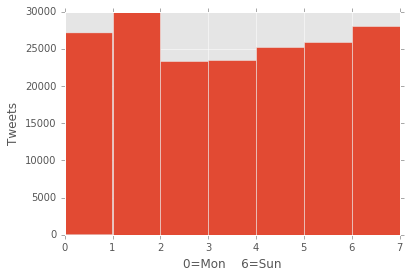

In [23]:
dow = pd.Series(dates.created_at.dt.weekday)
dow.hist(bins=[0,1,2,3,4,5,6,7])
plt.xlabel('0=Mon    6=Sun')
plt.ylabel('Tweets')

In [18]:
nums = pd.read_csv(os.path.join(DATA_PATH, 'numbers.csv.gz'), engine='python')

In [19]:
features = pd.DataFrame({'faves': nums.favorite_count, 'weekday': dow})

,faves,weekday
0,0,6
1,0,6
2,1,6
...,...,...
183067,0,6
183068,0,6
183069,0,6


In [24]:
names = pd.Series([''] * len(dow), index=dow.index)
for i, label in enumerate('Mon Tues Wed Thurs Fri Sat Sun'.split()):
    names[dow == i] = label

In [33]:
faves_by_dow = pd.Series(Counter(names[nums.favorite_count > 0]))
faves_by_dow

Fri      4925
Mon      4945
Sat      4591
Sun      4971
Thurs    4399
Tues     5131
Wed      4330
dtype: int64

In [34]:
fave_ratio_by_dow = pd.Series(Counter(names[nums.favorite_count > 0])) / pd.Series(Counter(names))
fave_ratio_by_dow

Fri      0.194780
Mon      0.182197
Sat      0.177547
Sun      0.177074
Thurs    0.187447
Tues     0.171479
Wed      0.185654
dtype: float64

Keep in mind, these aren't big differences  
And we have a sample bias ("Python" in May)

Now it's your turn  
Can you do a similar analysis for Time of Day  
Hint: think of a good "bin" size  
Use tab-completion on the `dt` accessor method of the dates you are interested in  